In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#dataset taken from https://www.kaggle.com/smid80/weatherww2/data

#importing original data set

#df = pd.read_csv("WeatherSummary.csv", low_memory=False)

In [3]:
#df.head()

In [4]:
# Making a smaller dataset to save memory

#newdf = df[['Date','Precip','MinTemp','MaxTemp']]
#newdf.to_csv("WeatherSummarySmall.csv")
#newdf.head()

In [5]:
df = pd.read_csv("WeatherSummarySmall.csv")
df.head()

,Unnamed: 0,Date,Precip,MinTemp,MaxTemp
0,0,1942-7-1,1.016,22.222222,25.555556
1,1,1942-7-2,0,21.666667,28.888889
2,2,1942-7-3,2.54,22.222222,26.111111
3,3,1942-7-4,2.54,22.222222,26.666667
4,4,1942-7-5,0,21.666667,26.666667


In [6]:
# deleting extra column and detailing dataset

del df["Unnamed: 0"]
df.describe()

,MinTemp,MaxTemp
count,119040.000000,119040.000000
mean,17.789511,27.045111
std,8.334572,8.717817
min,-38.333333,-33.333333
25%,15.000000,25.555556
50%,21.111111,29.444444
75%,23.333333,31.666667
max,34.444444,50.000000


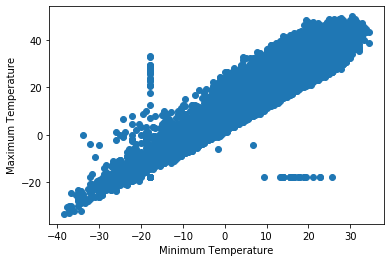

In [7]:
# Checking the linear relationship between minimum and Maximum Temperature

plt.scatter(df.MinTemp,df.MaxTemp)
plt.xlabel("Minimum Temperature")
plt.ylabel("Maximum Temperature")
plt.show()

In [8]:
# Dividing the dataset into train and test data

import numpy as np 
from sklearn.model_selection import train_test_split
X = np.asanyarray(df[['MinTemp']])
y = np.asanyarray(df[['MaxTemp']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [9]:
# Training the linear regression modell

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

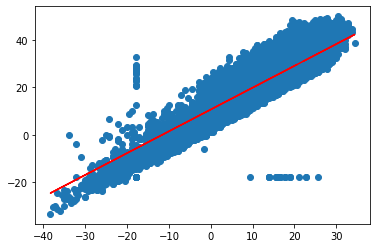

In [10]:
# Plotting the linear regression line
# y = mx + b
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.coef_[0][0]*X_train + regr.intercept_[0], color ='red')
plt.show()

In [12]:
# Evaluating the model. 

from sklearn.metrics import r2_score

yhat_test = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat_test - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(yhat_test , y_test) )

Mean absolute error: 3.18
Residual sum of squares (MSE): 17.20
R2-score: 0.70
